# The Output Delivery System and Graphics

In this lesson, we'll learn how to use the SAS System's Output Delivery System (ODS) to create other forms of output, such as HTML output that can be viewed by your web browser, PDF files that are formatted for high-resolution printers, and RTF files that can be easily imported into Microsoft Word. Along the way, we'll also learn how to modify the appearance of the output that is obtained by default from any procedure. Finally, we'll learn how to use the Output Delivery System to create SAS data sets instead of the default output from various procedures.

We will also return to the SG plotting procedures to investigate how to adjust graphical parameters such as line types, colors, axes labels, legends, etc.

## The Output Delivery System

You might be getting the impression that by learning about the Output Delivery System (ODS) in this lesson that it will be the first time we use it. In reality, SAS has been using it behind the scenes all along to create the listing output that the procedures we've used generates by default. All we want to do in this lesson is learn how ODS works and how to change the default settings so that we can get the output that we want rather than the output that SAS wants.

### How ODS Works

So how does ODS work? Whenever you submit a program that creates output, ODS does the following:

1) ODS creates your output in the form of **output objects**. Each output object is comprised of two components. The **data component** contains the results — think numbers — of a procedure or a DATA step. The **table definition** tells SAS how to render the results — think structure. For example, suppose we executed the FREQ procedure so that it created the following output:

<div class="sample-output--region mb-3">
<table class="table table-bordered table-sm mw-25">
	<thead>
		<tr>
			<th>A</th>
			<th colspan="3">B</th>
		</tr>
		<tr>
			<th>Frequency Percent</th>
			<th class="text-align-right">1</th>
			<th class="text-align-right">2</th>
			<th class="text-align-right">Total</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td class="text-align-right" rowspan="2">1</td>
			<td class="text-align-right">60</td>
			<td class="text-align-right">40</td>
			<td class="text-align-right">100</td>
		</tr>
		<tr>
			<td class="text-align-right">30.00</td>
			<td class="text-align-right">20.00</td>
			<td class="text-align-right">50.00</td>
		</tr>
		<tr>
			<td class="text-align-right" rowspan="2">2</td>
			<td class="text-align-right">40</td>
			<td class="text-align-right">60</td>
			<td class="text-align-right">100</td>
		</tr>
		<tr>
			<td class="text-align-right">20.00</td>
			<td class="text-align-right">30.00</td>
			<td class="text-align-right">50.00</td>
		</tr>
		<tr>
			<td rowspan="2">Total</td>
			<td class="text-align-right">100</td>
			<td class="text-align-right">100</td>
			<td class="text-align-right">200</td>
		</tr>
		<tr>
			<td class="text-align-right">50.00</td>
			<td class="text-align-right">50.00</td>
			<td class="text-align-right">100.00</td>
		</tr>
	</tbody>
</table>
</div>

<p>SAS actually creates this piece of output from its two parts, the table definition:</p>


<div class="sample-output--region mb-3">
<table class="table table-bordered table-sm mw-25">
	<thead>
		<tr>
			<th>A</th>
			<th colspan="3">B</th>
		</tr>
		<tr>
			<th>Frequency Percent</th>
			<th class="text-align-right">1</th>
			<th class="text-align-right">2</th>
			<th class="text-align-right">Total</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td class="text-align-right" rowspan="2">1</td>
			<td class="text-align-right">&nbsp;</td>
			<td class="text-align-right">&nbsp;</td>
			<td class="text-align-right">&nbsp;</td>
		</tr>
		<tr>
			<td class="text-align-right">&nbsp;</td>
			<td class="text-align-right">&nbsp;</td>
			<td class="text-align-right">&nbsp;</td>
		</tr>
		<tr>
			<td class="text-align-right" rowspan="2">2</td>
			<td class="text-align-right">&nbsp;</td>
			<td class="text-align-right">&nbsp;</td>
			<td class="text-align-right">&nbsp;</td>
		</tr>
		<tr>
			<td class="text-align-right">&nbsp;</td>
			<td class="text-align-right">&nbsp;</td>
			<td class="text-align-right">&nbsp;</td>
		</tr>
		<tr>
			<td rowspan="2">Total</td>
			<td class="text-align-right">&nbsp;</td>
			<td class="text-align-right">&nbsp;</td>
			<td class="text-align-right">&nbsp;</td>
		</tr>
		<tr>
			<td class="text-align-right">&nbsp;</td>
			<td class="text-align-right">&nbsp;</td>
			<td class="text-align-right">&nbsp;</td>
		</tr>
	</tbody>
</table>
</div>

<p>and the data component:</p>


<div class="sample-output--region mb-3">
<table class="table table-bordered table-sm mw-25">
	<thead>
		<tr>
			<th class="text-primary">A</th>
			<th class="text-primary">B</th>
			<th class="text-primary">COUNT</th>
			<th class="text-primary">PERCENT</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td>&nbsp;</td>
			<td>1</td>
			<td>60</td>
			<td>30</td>
		</tr>
		<tr>
			<td>1</td>
			<td>2</td>
			<td>40</td>
			<td>20</td>
		</tr>
		<tr>
			<td>2</td>
			<td>1</td>
			<td>40</td>
			<td>20</td>
		</tr>
		<tr>
			<td>2</td>
			<td>2</td>
			<td>60</td>
			<td>30</td>
		</tr>
	</tbody>
</table>
</div>

<p>2) Once SAS creates all of the output objects from an executed program, it then just needs to figure out where to send the objects. It's actually pretty easy... SAS sends the output to whatever ODS destination(s) you tell SAS to send it. And when doing so, SAS sends the output in the format specified by the destination. This is where ODS is really powerful and therefore really neat! Besides the listing output generated by SAS procedures by default, and among others, you can send your output to...</p>

<table class="text-align-center mw-50">
	<tbody>
		<tr>
			<td width="230"><strong>this destination ...</strong></td>
			<td width="418"><strong>to produce...</strong></td>
		</tr>
		<tr>
			<td width="200">HTML</td>
			<td>output that is formatted in HyperText Markup Language (HTML), and therefore viewable by web browsers</td>
		</tr>
		<tr>
			<td>Output</td>
			<td>SAS data sets</td>
		</tr>
		<tr>
			<td>Printer Family</td>
			<td>output that is formatted for a high-resolution printer, such as Post Script (PS), Portable Document Format (PDF), and Printer Control Language (PCL) files</td>
		</tr>
		<tr>
			<td>RTF</td>
			<td>rich text format output for use with Microsoft Word</td>
		</tr>
	</tbody>
</table>

<p>In the next section, we'll learn how to tell SAS where to send the output it generates by "opening" and "closing" these various ODS destinations.</p>

### Opening and Closing ODS Destinations

If you are perfectly content with your output being sent to the output window in the default HTML format, then you don't have tell SAS anything at all. That's because the HTML destination is open by default. On the other hand, if you want to tell SAS to send your output to another ODS destination, PDF say, then you have to open the destination before the SAS code that generates your output.

To open a destination, you simply submit the following ODS statement:

`ODS open-destination;`;

where open-destination is a keyword (as well as any required options for the destination) that tells SAS where you want to send your output. In this lesson, we'll focus only on the most commonly used keyword destinations: **Listing**, **HTML**, **RTF**, and **PDF**.

After the SAS code that generates your output, you have to tell SAS to close the destination so that you can access your output. To close a destination, you simply submit the following ODS statement:

`ODS close-destination CLOSE;`

where close-destination is the same keyword as the open-destination.

In theory, you can submit ODS statements in any order, depending on whether you need to open or close an ODS destination. In practice, however, most ODS destinations are closed by default, so that you open them at the beginning of your program and close them at the end. The exception is the HTML destination, which is open by default. Let's take a look at an example.

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <h3>Example</h3>
    <p>You might recall that the SAS data set called penngolf contains information, such as the total yardage and par, of eleven golf courses in Pennsylvania. The following program opens the HTML destination so that a subset of the penngolf data set can be printed in HTML format as well as the default HTML format in the output window:</p>
</div>

In [2]:
LIBNAME phc6089 "/folders/myfolders/SAS_Notes/data";
 
ODS HTML file = '/folders/myfolders/SAS_Notes/output/html/golf.html';
 
PROC PRINT data = phc6089.penngolf NOOBS;
   title 'Some of the penngolf data set variables';
   ID name;
   var year type par yards;
RUN;
 
ODS HTML CLOSE;
ODS HTML;

Name,Year,Type,Par,Yards
Toftrees,1968,Resort,72,7018
Penn State Blue,1921,Public,72,6525
Centre Hills,1921,Private,71,6392
Lewistown CC,.,Private,72,6779
State College Elks,1973,SemiPri,71,6369
Park Hills CC,1966,SemiPri,70,6004
Sinking Valley CC,1967,SemiPri,72,6755
Williamsport CC,1909,Private,71,6489
Standing Stone GC,1973,SemiPri,70,6593
Bucknell GC,1960,SemiPri,70,6253


<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <p>This code illustrates the standard ODS practice mentioned earlier... open your destinations at the top of your program, and close them at the bottom. Here, the first ODS statement tells SAS to open the HTML destination and to save the HTML output generated by the PRINT procedure that follows to the specified file name. The second ODS statement tells SAS to close the HTML destination so that we can access the created HTML file.</p>
    <p>Download and save the penngolf (see the data folder on the course website if you don't already have it) data set to a convenient location on your computer. Then, launch the SAS code, and edit the LIBNAME statement so that it reflects the location in which you saved the data set. Also, edit the first ODS statement's FILE= option so that it reflects the location and name of the file where you want the resulting HTML output to be sent. (Make sure that you give your filename the standard .html extension.) Finally, run the SAS program. In doing so, you should note that SAS generates two pieces of output. The default output is displayed, as always, in the output window (as shown above). An html file copy of this output is save to at the PATH you specified in the FILE statement of ODS HTML.</p>
</div>

You can simultaneously create output in multiple outputs by using ODS, so you can have multiple output destinations open at any given time. Each open output destination uses resources, so if you do not need to output to that particular destination, it is a good idea to close it. When you have more than one open ODS destination you can use the keyword shortcut _ALL_ to close all of the destinations concurrently. That is, the following statement:

`ODS _ALL_ CLOSE;`

closes all currently open destinations at once. Then you can reopen whichever output desination you would like to use.

### Producing HTML Output

We have been using HTML output as our default output to the Results Viewer, but if we would like to save the HTML output to an external file, then we can use the HTML keyword in the ODS statement with a save option such as FILE. In this section, we'll extend what we learned there by:

* creating HTML output from multiple procedures at once;
* creating HTML output with a table of contents; and
* using options to specify links and paths.

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <h3>Example</h3>
    <p>The following program uses the penngolf data set to simultaneously create HTML output from the PRINT and REPORT procedures:</p>
</div>

In [4]:
ODS HTML body = '/folders/myfolders/SAS_Notes/output/html/golf2.html';
 
PROC PRINT data = phc6089.penngolf NOOBS;
    title 'Some Par 72 Pennsylvania Golf Courses';
    ID name;
    var year type yards;
    where par = 72;
RUN;
 
PROC REPORT data = phc6089.penngolf NOWINDOWS HEADLINE HEADSKIP;
    title 'Average Size of Some PA Courses';
    column type par yards;
    define type /group;
    define yards / analysis mean format = 6.1 width = 10;
    define par / analysis mean format = 4.1 width = 10;
RUN;
 
ODS HTML CLOSE;
ODS HTML;

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <p>Before launching and running the program, let's take a quick look at the code to make sure we know what it's doing:</p>
    <ul>
        <li>The first ODS statement tells SAS to open the HTML destination and to save the HTML output generated by the code to the specified file name. Note that rather than using the ODS HTML statement's FILE= option, we used the BODY= option to tell SAS where to save the HTML output. The two options are interchangeable. That is, the BODY= option is an alias for the FILE= option.</li>
        <li>Then, we use the PRINT procedure to tell SAS to print some information about the par 72 golf courses.</li>
        <li>Then, we use the REPORT procedure to tell SAS to calculate the average yardage and average par for each of the four types of golf courses.</li>
        <li>The second ODS statement tells SAS to close the HTML destination so that we can access the created HTML file.</li>
        <li>And, the last ODS statement tells SAS to re-open the HTML destination.</li>
    </ul>
    <p>Now, go ahead and launch the SAS program. Again, you'll have to edit the first ODS HTML statement to reflect where you would like your HTML file stored. Then, run the SAS program, and review the output as it appears in the SAS Results Viewer. You should first see the output from the PRINT procedure and then the output from the REPORT procedure as shown above.</p>
    <p>You should also note that SAS saves the generated HTML output in the file specified in the first ODS HTML statement. To see the file, go to the folder in which you told SAS to store the HTML file. Here's what my folder looks like after running the program.</p>
    <p>When we run the above code, SAS creates the golf2.html file. You should see the same output that SAS displays in the SAS Results Viewer. It is this physical golf2.html file though that you could easily post to a public web site or e-mail to someone else.</p>
</div>

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <h3>Example: Creating HTML Output with a Table of Contents</h3>
    <p>When you have a program that creates many pages of output, you might find it useful for SAS to create a table of contents for the output. The following program is identical to the previous program, except the first ODS HTML statement has been modified to tell SAS to create a table of contents for the output that SAS generates:</p>
</div>

In [8]:
ODS HTML path = '/folders/myfolders/SAS_Notes/output/html/' (url = none)
         body = 'golf3.html'
         contents = 'golf3toc.html'
         frame = 'golf3frame.html';
 
PROC PRINT data = phc6089.penngolf NOOBS;
    title 'Some Par 72 Pennsylvania Golf Courses';
    ID name;
    var year type yards;
    where par = 72;
RUN;
 
PROC REPORT data = phc6089.penngolf NOWINDOWS HEADLINE HEADSKIP;
    title 'Average Size of Some PA Courses';
    column type par yards;
    define type /group;
    define yards / analysis mean format = 6.1 width = 10;
    define par / analysis mean format = 4.1 width = 10;
RUN;
 
ODS HTML CLOSE;
ODS HTML;

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <p>Since the code is almost identical to the previous program, the only code that needs explanation this time around is that first ODS HTML statement. The PATH= option tells SAS where to store the subsequent files. The BODY=, CONTENTS=, and FRAME= specify the name of the output html files which store the body (the actual tables), the table of contents, and a combined webpage of the body and table of contents in the folder specified by PATH. The url=none option in PATH= essentially tells SAS to form HTML files that use relative paths to reference links. In this case, the body and contents file must be in the same folder for the frame file to work.</p>
</div>

If you're not familiar with at least the concept of Hypertext Markup Language (HTML), then you would find this topic quite challenging. In short, HTML is the behind-the-scenes language that tells your web browser what to display. If you go to any web page, and view the page source, you'll see the HTML code that displays the web page that you are viewing. (Using Mozilla's Firefox browser, you can view the page source by selecting View and then Page Source. Using an Internet Explorer browser, you can view the page source by selecting Page and then View Source). This topic concerns the pathnames that SAS creates when it creates HTML output files for you. If the pathnames aren't well specified, then you would have trouble sharing your SAS-created HTML output files with others.

### Producing Other Types of Output

Thus far, we have used ODS statements to tell SAS to create HTML output. As mentioned earlier, we can also use ODS statements to tell SAS to create other kinds of output. In this section, we'll take a look at two examples in which we tell SAS to make different kinds of output. In the first example, we make RTF output that can be easily copied into Microsoft Word. In the second example, we make PDF output that can be then sent to a high-resolution printer.

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <h3>Example</h3>
    <p>The following program tells SAS to print a subset of the penngolf data set and when doing so to send the output to an RTF destination:</p>
</div>

In [9]:
ODS HTML CLOSE;
ODS RTF file = '/folders/myfolders/SAS_Notes/output/rtf/golf5.rtf'
    BODYTITLE;
        
PROC PRINT data = phc6089.penngolf NOOBS;
    title 'Some Par 72 Pennsylvania Golf Courses';
    ID name;
    var year type yards;
    where par = 72;
RUN;
        
ODS RTF CLOSE;
ODS HTML;

Name,Year,Type,Yards
Toftrees,1968,Resort,7018
Penn State Blue,1921,Public,6525
Lewistown CC,.,Private,6779
Sinking Valley CC,1967,SemiPri,6755
Mount Airy Lodge,1972,Resort,7123


<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <p>As you can see, to tell SAS to send output to the RTF destination, we simply use the RTF keyword in an ODS statement. By default, titles and footnotes are put into Word headers and footers. The BODYTITLE option in the ODS RTF statement tells SAS to instead put titles and footnotes in the main part of the RTF document. Note that the second-to-last ODS statement tells SAS to close the RTF destination, while the last ODS statement tells SAS again to re-open the HTML destination.</p>
    <p>If you are on Windows, then you may see a pop-up window asking to save or open the output rtf file. RTF files can be opened with word or pages.</p>
</div>

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <h3>Example</h3>
    <p>The following program does exactly the same thing as the previous program, except the output here is sent to a PDF file:</p>
</div>

In [11]:
ODS HTML CLOSE;
ODS PDF file = '/folders/myfolders/SAS_Notes/output/pdf/golf5.rtf';
        
PROC PRINT data = phc6089.penngolf NOOBS;
    title 'Some Par 72 Pennsylvania Golf Courses';
    ID name;
    var year type yards;
    where par = 72;
RUN;
        
ODS PDF CLOSE;
ODS HTML;

Name,Year,Type,Yards
Toftrees,1968,Resort,7018
Penn State Blue,1921,Public,6525
Lewistown CC,.,Private,6779
Sinking Valley CC,1967,SemiPri,6755
Mount Airy Lodge,1972,Resort,7123


<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <p>Pretty straightforward... as you can see, to tell SAS to send output to the PDF destination, we simply use the PDF keyword in an ODS statement. Note again that the second-to-last ODS statement tells SAS to close the PDF destination, while the last ODS statement tells SAS again to re-open the Listing destination.</p>
</div>

### Tracing and Selecting Procedure Output

As discussed earlier, when ODS receives data from a procedure, it combines the data component with a table definition to create an output object. For many procedures, ODS creates just one output object, while for others it produces several. Procedures involving a BY statement, for example, typically produce an output object for each BY group. When a procedure does create more than one output object, you might not want SAS to include all of them in your output. You might instead want to tell SAS to select just one or two of the output objects. In this section, we learn how to use the ODS TRACE and ODS SELECT statements to choose the specific output objects that you want SAS to display in your output.

The ODS TRACE ON statement tells SAS to print information in the log about the output objects created by all of the code in your program between the ODS TRACE ON statement and a closing ODS TRACE OFF statement.

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <h3>Example</h3>
    <p>The following program uses ODS TRACE statements to capture information about the output objects created by the MEANS procedure on a data set called golfbypar, which is just a sorted version of the penngolf data set:</p>
</div>

In [12]:
PROC SORT data = phc6089.penngolf out = golfbypar;
    by par;
RUN;
 
ODS TRACE ON;
PROC MEANS data = golfbypar;
    by par;
    title 'Pennsylvania Golf Courses by Par';
RUN;
ODS TRACE OFF;

Variable,N,Mean,Std Dev,Minimum,Maximum
ID Year Yards Slope USGA,3 3 3 3 3,108.3333333 1966.33 6283.33 126.0000000 70.2333333,2.0816660 6.5064071 295.6692972 6.0000000 1.0692677,106.0000000 1960.00 6004.00 120.0000000 69.3000000,110.0000000 1973.00 6593.00 132.0000000 71.4000000
Variable,N,Mean,Std Dev,Minimum,Maximum
ID Year Yards Slope USGA,3 3 3 3 3,105.3333333 1934.33 6416.67 127.3333333 71.3333333,2.5166115 34.0196022 63.6893502 4.0414519 0.5131601,103.0000000 1909.00 6369.00 123.0000000 70.9000000,108.0000000 1973.00 6489.00 131.0000000 71.9000000
Variable,N,Mean,Std Dev,Minimum,Maximum
ID Year Yards Slope USGA,5 4 5 5 5,105.0000000 1957.00 6840.00 131.8000000 73.2600000,4.0620192 24.0970261 235.5546646 5.7619441 1.0830512,101.0000000 1921.00 6525.00 125.0000000 72.0000000,111.0000000 1972.00 7123.00 140.0000000 74.3000000


<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <p>The SORT procedure, of course, just sorts the permanent data set phc6089.penngolf by par and stores the sorted result in a temporary data set called golfbypar. Then, the ODS TRACE ON statement tells SAS to start capturing information about any output objects that are created. The MEANS procedure tells SAS to summarize the golfbypar data set for each level of par, that is, when par equals 70, 71 and 72. Finally, the ODS TRACE OFF statement tells SAS to stop capturing information about any output objects that are created.</p>
    <p>Launch and run the SAS program. You can go ahead and review the output from the MEANS procedure, but what we're really interested in here is the information SAS displays about the output objects in the log window:</p>
    <img src="./img/sas_trace_log.gif" alt="SAS log window with TRACE output for PROC MEANS">
    <p>As the log suggests, the MEANS procedure creates one output object for each BY group (par = 70, par = 71, and par = 72). The three output objects share the same name, label, and template, but different paths. The path for the par = 70 output object, for example, is called Means.ByGroup1.Summary, while the path for the par = 71 output objects is called Means.ByGroup2.Summary. Once we know the names of the output objects, we can use an ODS SELECT statement to tell SAS the specific output objects that we want displayed. To select specific output objects, simply place an ODS SELECT statement within the relevant procedure. By default, the ODS SELECT statement lasts only for the procedure in which it is contained.</p>
</div>

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <h3>Example</h3>
    <p>The following program uses an ODS SELECT statement and what we learned from tracing our MEANS procedure to print just the portion of the output that pertains to the par 70 golf courses:</p>
</div>

In [14]:
PROC MEANS data = golfbypar;
    by par;
    title 'Par 70 Golf Courses';
    ODS SELECT Means.ByGroup1.Summary;
RUN;

ODS SELECT ALL; *Reset selection to all output tables;

Variable,N,Mean,Std Dev,Minimum,Maximum
ID Year Yards Slope USGA,3 3 3 3 3,108.3333333 1966.33 6283.33 126.0000000 70.2333333,2.0816660 6.5064071 295.6692972 6.0000000 1.0692677,106.0000000 1960.00 6004.00 120.0000000 69.3000000,110.0000000 1973.00 6593.00 132.0000000 71.4000000


<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <p>Launch and run the SAS program, and review the output to convince yourself that SAS displays only the portion of the MEANS procedure that pertains to the par 70 golf courses shown above.</p>
    <p>ODS SELECT (and likewise ODS EXCLUDE) have two special keywords ALL and NONE which all you to SELECT/EXCLUDE ALL or NONE of the output. Here, we use ODS SELECT ALL to reset SAS from only SELECTING the table Means.ByGroup1.Summary, so that subsequent SAS PROC class will produce output. Otherwise, only this currently selected table will show and all other output would be hidden.
</div>

### Changing the Appearance of Your Output

 have good news and bad news for you about changing the appearance of your output. The good news is that if you had enough time to learn all of the ways in which you could change the appearance of your SAS output, you could create just about anything you wanted. The bad news is that we don't have enough time in this course to explore all of the possibilities. In fact, we'll barely nibble the surface. In this section, we will only investigate how to use the ODS HTML statement's STYLE= option to change the appearance of the default HTML output by using one of the many predefined style templates built into SAS.
 
<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <h3>Example</h3>
    <p>The following program uses the ODS HTML statement's STYLE= option to tell SAS to use the meadow style when displaying the HTML output created by printing a subset of the phc6089.penngolf data set:</p>
</div>

In [15]:
ODS HTML file = '/folders/myfolders/SAS_Notes/output/html/golf9.html'
        style = meadow;
 
PROC PRINT data = phc6089.penngolf NOOBS;
   title 'Some of the penngolf data set variables';
   ID name;
   var year type par yards;
RUN;
 
ODS HTML CLOSE;
ODS HTML;

Name,Year,Type,Par,Yards
Toftrees,1968,Resort,72,7018
Penn State Blue,1921,Public,72,6525
Centre Hills,1921,Private,71,6392
Lewistown CC,.,Private,72,6779
State College Elks,1973,SemiPri,71,6369
Park Hills CC,1966,SemiPri,70,6004
Sinking Valley CC,1967,SemiPri,72,6755
Williamsport CC,1909,Private,71,6489
Standing Stone GC,1973,SemiPri,70,6593
Bucknell GC,1960,SemiPri,70,6253


<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <p>As you can see, telling SAS what style to use is as simple as adding the STYLE= option to the ODS HTML statement. Launch and run the SAS program, and review the output to see the appearance of the HTML output when created using the meadow style template.</p>
</div>

Of course you are asking yourself "how would I know that meadow is one of the available predefined styles?" Fortunately, the answer is simple enough. The following TEMPLATE procedure produces a list of the predefined style templates that are available on your system:

<pre><code>
PROC TEMPLATE;
    LIST STYLES;
RUN;
</code></pre>

Launch and run the SAS code, and review the output to see the list of predefined styles that are shipped with SAS. You might want to try some of the styles out yourself. While I do find some of the styles rather nice, I personally find some of them rather hideous (and therefore useless to me).

### Creating SAS DATA Sets from Procedure Output

You may recall that earlier we used an OUTPUT statement in the MEANS procedure to create a data set containing summary statistics, such as means and standard deviations. We'll see in this section that we could have alternatively used ODS to first save the summary statistics and then send it to the OUTPUT destination. In fact, we can use ODS to save just about any part of any procedure's output!

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <h3>Example</h3>
    <p>The following program uses an ODS OUTPUT statement to create a temporary SAS data set called summout from the Summary output object created by the MEANS procedure, and then prints the resulting summout data set:</p>
</div>

In [16]:
PROC MEANS data = golfbypar;
    by par;
    var yards;
    title 'Pennsylvania Golf Courses by Par';
    ODS OUTPUT Summary = summout;
RUN;
 
PROC PRINT data = summout NOOBS;
    title 'The summout data set';
RUN;

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <p>Now, something that might not be obvious from this code is that the name of the output object, Summary, was determined from first tracing the MEANS procedure. If you refer back to the information SAS displayed in the log for the previous example using ODS TRACE, you can see that, since we want to capture all of the output from the MEANS procedure, the desired output object is called Summary. The ODS OUTPUT statement tells SAS that we want to save the data contained in the Summary output object in a data set called summout. Of course, the PRINT procedure then tells SAS to print the summout data set. Launch and run the SAS program, and review the output to convince yourself that the summout data set does indeed contain the data summarized by the MEANS procedure.</p>
    <p>You do need to be careful where you put ODS statements in your program. For example, if rather than putting the ODS OUTPUT statement just before the MEAN procedure's RUN statement, we had instead put it after the MEAN procedure's RUN statement and before the PRINT procedure's PROC PRINT statement, we would not have captured the Summary data set. Instead, we would get the following Warning message:</p>
    <pre>
    WARNING: Output 'Summary' was not created. Make sure that the output
	Object name, label, or path is spelled corectly. Also
    Verify that the appropriate procedute options are used to
    produce the request output object. For example, verify that
    the NOPRINT option is not used
    </pre>
    <p>You might want to move the ODS statement as described, and re-run the SAS program just to see this for yourself.</p>
</div>

## Using Plot Options to Control Graph Appearance

The ODS Graphics procedures also enable you to control the appearance of particular graphics elements in a graph. Graphics elements include lines, bars, markers, text, and so on.

Many ODS Graphics procedure statements have options and suboptions that control the appearance of different parts of a plot or graph. Default visual attributes of various graphics elements are derived from the specific style elements of the active style. By using appearance options in your procedure statements, you can change the appearance of one or more aspects of your graph without changing the overall style.

For most of our examplew, we will use the child mortality dataset, indicatordeadkids35.csv.

In [8]:
FILENAME mortcsv '/folders/myfolders/SAS_Notes/data/indicatordeadkids35.csv';

PROC IMPORT datafile = mortcsv 
            out = mort(RENAME=(VAR1=Country)) 
            dbms = CSV 
            replace;
    getnames = yes;
    guessingrows = max;
RUN;

DATA long;
  SET mort;
  ARRAY years{*} '1760'n -- '2009'n  '2010'n '2030'n '2050'n '2099'n;
  DO i = 1 to dim(years);
    year = INPUT(vname(years{i}), 4.);
    morts = years{i};
    OUTPUT;
  END;
  DROP i '1760'n -- '2009'n  '2010'n '2030'n '2050'n '2099'n;
RUN;

PROC CONTENTS data = long;
RUN;

PROC PRINT data = long (obs = 5);
RUN;

### The SG Plotting Procedures

Let's quickly review how to make some basic plots using PROC SGPLOT before we move on to how to customize their appearance. PROC SGPLOT can be used to make many common plots by using the corresponding statement:

* SCATTER - produces a scatterplot
* VBOX/HBOX - produces a vertical/horizontal boxplot
* SERIES - produces a lines/series plot
* DENSITY - produces a density plot
* HISTOGRAM - produces a histgram
* REG - Adds a least squares regression line fit to the plot
* LOESS - adds a nonparametric smoothing curve to the plot

For example, we could make a scatterplot of year vs mortality rate. Let's do this for the data from Sweden.


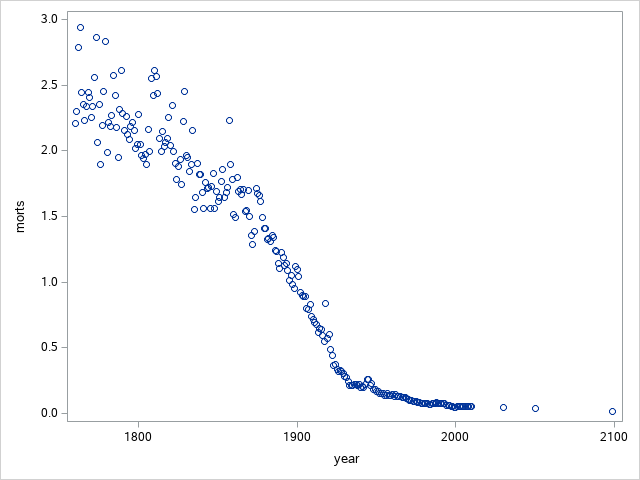

In [9]:
DATA sweden_long;
   SET long;
   WHERE country = "Sweden";
RUN;

PROC SGPLOT data = sweden_long;
   SCATTER Y = morts X = year;
RUN;

I could have also made a line plot by simply changing SCATTER to SERIES.


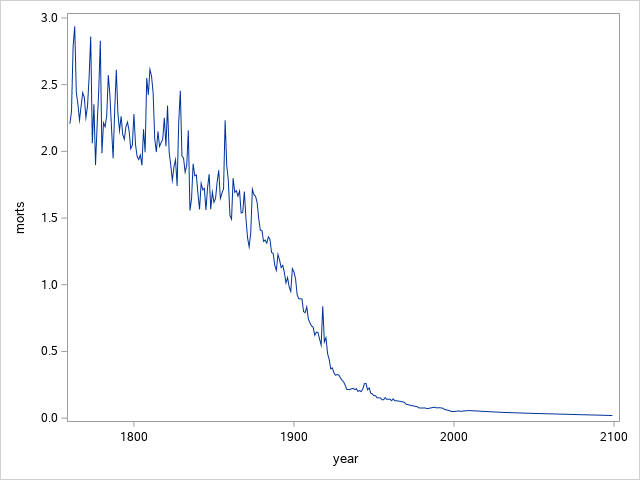

In [10]:
PROC SGPLOT data = sweden_long;
   SERIES Y = morts X = year;
RUN;

By using the LOESS statement, I can also add a nonparametric smoothing curve to this data and plot it ontop of the series plot.


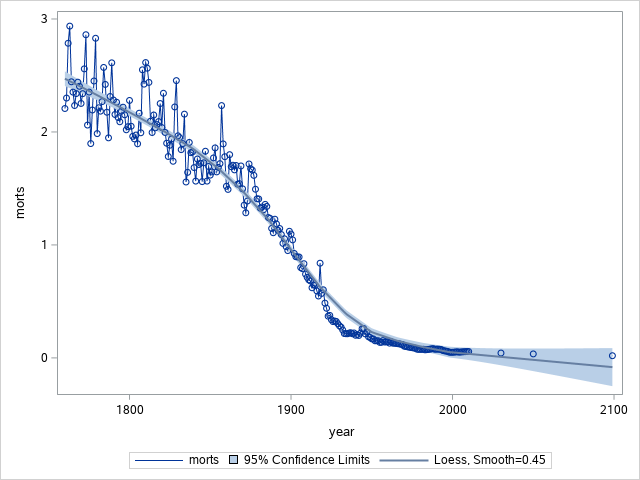

In [27]:
PROC SGPLOT data = sweden_long;
   SERIES Y = morts X = year;
   LOESS  Y = morts X = year / smooth = 0.45 CLM;
RUN;

Now, let’s look at the mortality rates over time using line plots for each of the countries: United States, United Kingdom, Sweden, Afghanistan, Rwanda. To get a line for each country individually, we need to specify the GROUP= option and assign it to the country variable.


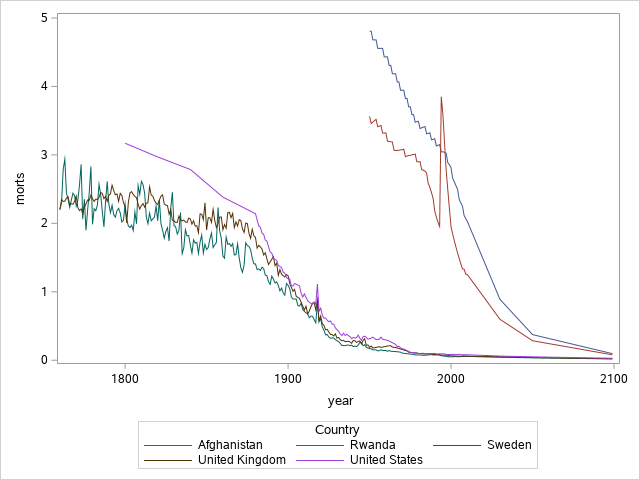

In [28]:
DATA sub;
   SET long;
   WHERE country in ("United States" "United Kingdom" 
                     "Sweden" "Afghanistan" "Rwanda");
RUN;

PROC SGPLOT data = sub;
   SERIES Y = morts X = year / group = country;
RUN;

Note that we get a single plot with trajectory over time of the mortality rates for each of these five countries. PROC SGPLOT will automatically assign default colors to differentiate each group and provide a legend. We will learn how to modify these later.

We could also make side by side boxplots of mortality rates by country by using the category= option in vbox/hbox.


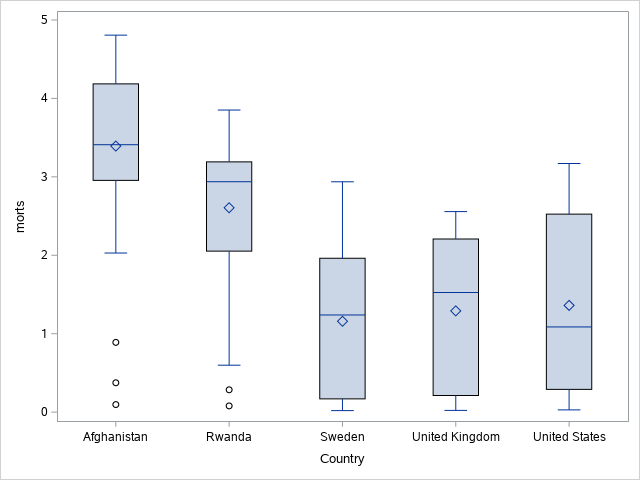

In [29]:
PROC SGPLOT data = sub;
   VBOX morts / category = country;
RUN;

### Axes and Titles

The first adjustment we might want to make to a plot is adding descriptive axis labels and a title. We can set the axis labels using the XAXIS and YAXIS LABEL= option (or we can set a LABEL to the variable in a DATA step). To set different levels of titles, we use the TITLE statements. The TITLE statement allows TITLE1-TITLE10 where as the TITLE number increase the size of the title decrease, so we can make subtitles. Note that the TITLE statements are global and not part of SGPLOT, so we will need to reset these or change them before making another plot in order to prevent the same titles from carrying over.


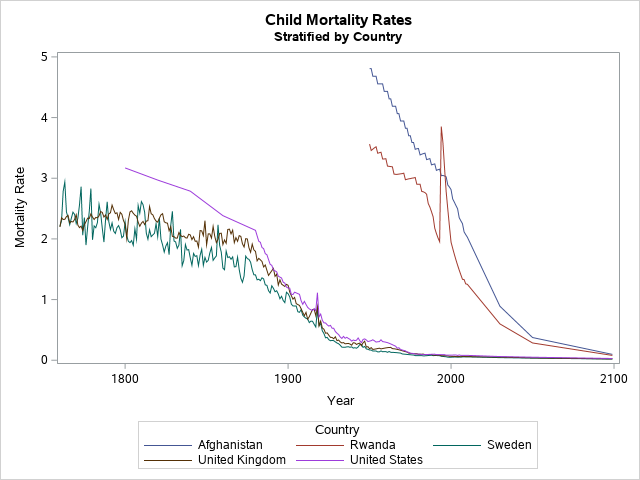

In [30]:
PROC SGPLOT data = sub;
   SERIES Y = morts X = year / group = country;
   XAXIS LABEL = "Year";
   YAXIS LABEL = "Mortality Rate";
   TITLE "Child Mortality Rates";
   TITLE2 "Stratified by Country";
RUN;

The x and y axis limits can be adjusted by using the MIN= and MAX= options in the XAXIS and YAXIS statments. For example, we can zoom in on the years 1900-2000 for the bottom three lines where the mortality rates range from 0 to 1.5.


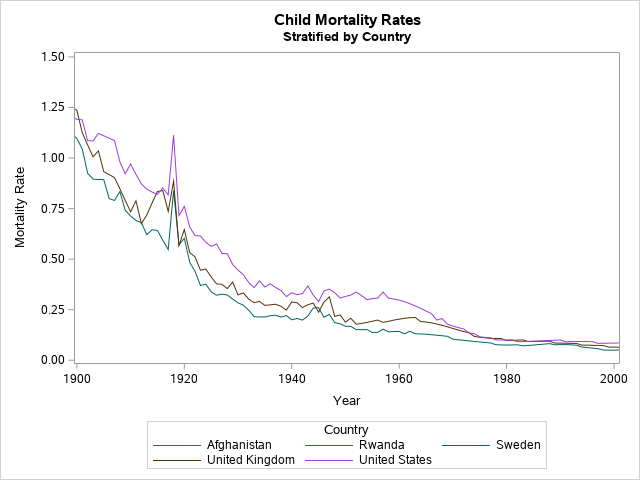

In [31]:
PROC SGPLOT data = sub;
   SERIES Y = morts X = year / group = country;
   XAXIS LABEL = "Year" MIN = 1900 MAX = 2000;
   YAXIS LABEL = "Mortality Rate" MIN = 0 MAX = 1.5;
   TITLE "Child Mortality Rates";
   TITLE2 "Stratified by Country";
RUN;

We may also want to change the default tic marks on the x and or y axes. This can be done using the VALUES= option in the XAXIS and YAXIS statements.


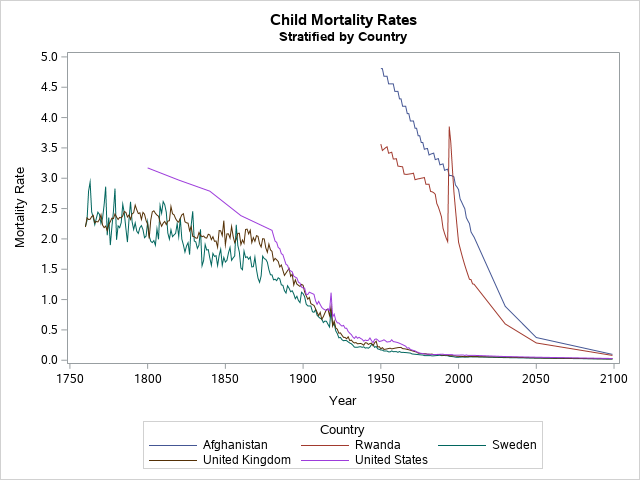

In [33]:
PROC SGPLOT data = sub;
   SERIES Y = morts X = year / group = country;
   XAXIS LABEL = "Year" VALUES = (1750 TO 2100 BY 50);
   YAXIS LABEL = "Mortality Rate" VALUES = (0 TO 5 BY 0.5);
   TITLE "Child Mortality Rates";
   TITLE2 "Stratified by Country";
RUN;

If you want to change the text displayed at each of these tic marks to be different from the actual numbers, use the VALUESDISPLAY= option.


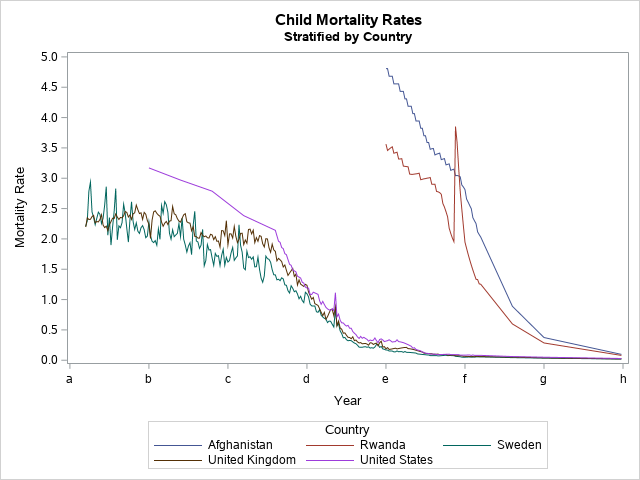

In [34]:
PROC SGPLOT data = sub;
   SERIES Y = morts X = year / group = country;
   XAXIS LABEL = "Year" VALUES = (1750 TO 2100 BY 50)
         VALUESDISPLAY = ('a' 'b' 'c' 'd' 'e' 'f' 'g' 'h');
   YAXIS LABEL = "Mortality Rate" VALUES = (0 TO 5 BY 0.5);
   TITLE "Child Mortality Rates";
   TITLE2 "Stratified by Country";
RUN;

The XAXIS and YAXIS statements also provide other options to modify the axis and label text such as color, font, position, and rotation:

* FITPOLICY= - specifies the method that is used to fit tick mark values on a horizontal axis when there is not enough room to draw them normally.
* LABELATTRS= - specifies the appearance of the axis labels.
* LABELPOS= - specifies the position of the axis label.
* VALUEATTRS= - specifies the appearance of the axis tick value labels.
* VALUESROTATE= specifies how the tick values are rotated on the axis with the possible options of DIAGONAL | DIAGONAL2 | VERTICAL (This only applies when axis text is overlapping. To force rotation, you must set FITPOLICY to ROTATEALWAYS but this only works in SAS 9.4M7 and on. Otherwise you must use an ANNOTATION data set.)

We can specify similar text options in a TITLE statement to adjust the text appearance in a title.


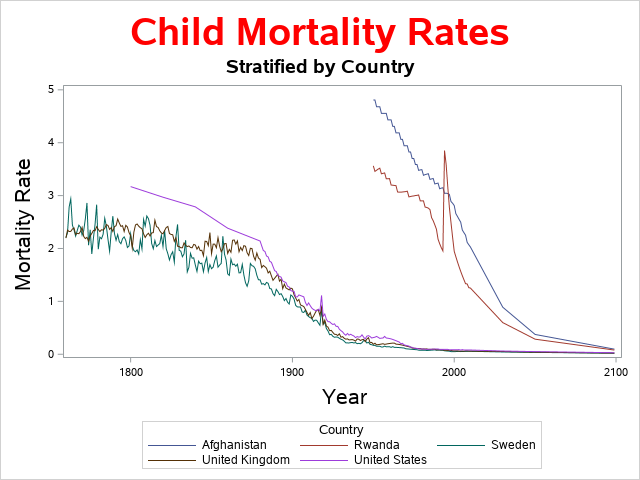

In [42]:
PROC SGPLOT data = sub;
   SERIES Y = morts X = year / group = country;
   * Note: The VALUESROTATE option only works here on SAS version 9.4M7 and later;
   XAXIS LABEL = "Year" FITPOLICY=ROTATEALWAYS VALUESROTATE = DIAGONAL2
         VALUEATTRS = (SIZE = 8) LABELATTRS = (SIZE = 15);
   YAXIS LABEL = "Mortality Rate " VALUEATTRS = (SIZE = 8)
         LABELATTRS = (SIZE = 15);
   TITLE HEIGHT = 1cm JUSTIFY = C BOLD COLOR = 'red' "Child Mortality Rates";
   TITLE2 HEIGHT = 0.5cm BOLD JUSTIFY = C "Stratified by Country";
RUN;

### Plotting Characters, Line Types and Their Colors

For basic plots without a grouping variable, we can use the corresponding ATTRS option to modify these visual characteristics:

* MARKERATTRS= - alter the visual appearance of plotting characters such as color, size, and plotting character (see <a href="https://documentation.sas.com/?docsetId=grstatproc&docsetTarget=p0i3rles1y5mvsn1hrq3i2271rmi.htm&docsetVersion=9.4&locale=en">Marker Attributes and Symbols</a> for more details)
* LINEATTRS - alter the visual appearance of a line such as color, line type and thickness (see <a href="https://documentation.sas.com/?docsetId=grstatproc&docsetTarget=p0er4dg9tojp05n1sf7maeqdz1d8.htm&docsetVersion=9.4&locale=en">Line Attributes and Patterns</a> for more details)

For example, let's adjust the plotting character in a scatterplot of mortality rate vs year for Sweden to be a red triangle.


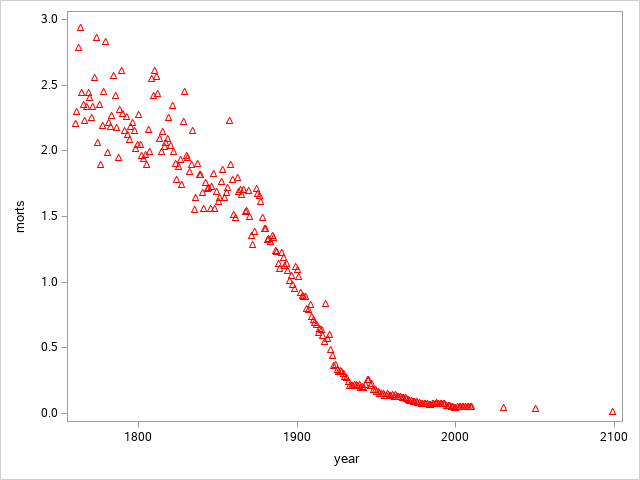

In [46]:
TITLE ; *Reset the titles;
TITLE2 ;
PROC SGPLOT data = sweden_long;
    SCATTER Y = morts X = year 
        / markerattrs=(color = 'red' symbol = Triangle);
RUN;

Or we can change the straight blue line to a dashed orange line in a SERIES plot.


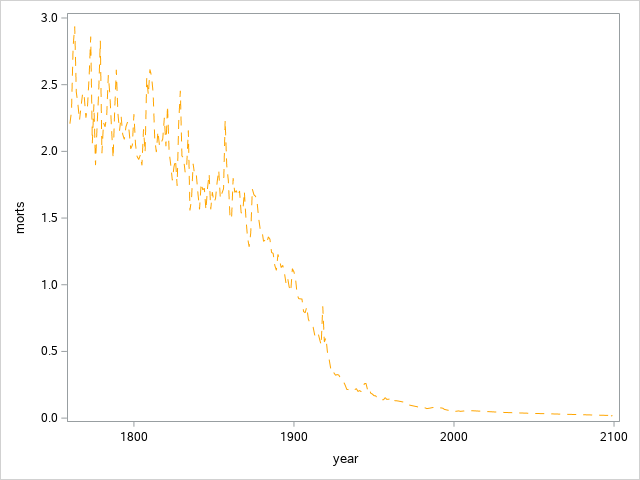

In [47]:
PROC SGPLOT data = sweden_long;
    SERIES Y = morts X = year 
        / linerattrs=(color = 'orange' pattern = dash);
RUN;

To set any of these attributes manually, we will need to use discrete attribute map dataset to pass in to the dattrmap= option and the attrid= option. This discrete attribute map dataset will define the mapping of our grouping variable to the different attributes such as color, line type or plotting character.

To create a discrete attribute map dataset, we must build a dataset using a DATA step with the following (character) variables:

* ID - this required string variable identifies all the rows that correspond to a single attribute map.
* VALUE - this required string variable identifies the grouping variables value that is being mapped in the current row.
* Other attribute variables - These will be reserved keywords such as linecolor and markercolor (see <a href="https://documentation.sas.com/?docsetId=grstatproc&docsetTarget=n18szqcwir8q2nn10od9hhdh2ksj.htm&docsetVersion=9.4&locale=en">Data Attribute Map Datasets</a> for a full list of reserved attribute keyword that can be used in a data map.)

Note that the dataset requires the two variables ID and VALUE. You must include and use these names in your attribute map for the mapping dataset to work with PROC SGPLOT.

For example, the following data attribute map will change the plotting characters and colors assigned to each country in the scatterplot of mortality rate versus year.


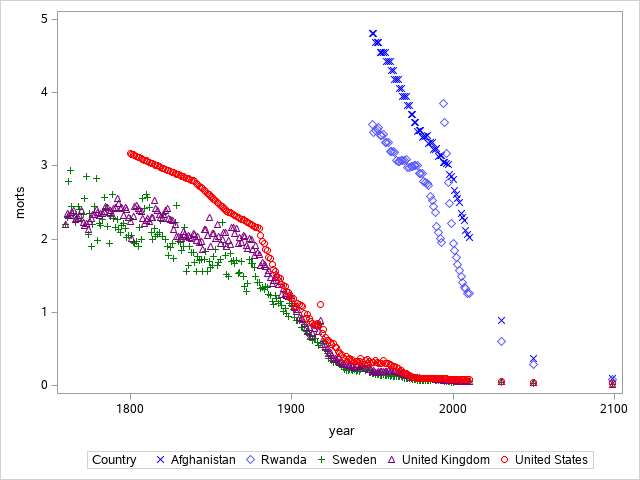

In [53]:
DATA marker_map;
   INPUT id $2. +1 VALUE $15. MARKERSYMBOL $8. MARKERCOLOR $10.;
   VALUE = strip(value);
   DATALINES;
ms Afghanistan    X        blue
ms Rwanda         Diamond  light blue
ms Sweden         plus     green
ms United Kingdom triangle purple
ms United States  circle   red
;
RUN;

PROC SGPLOT data = sub dattrmap = marker_map;
    SCATTER Y = morts X = year / group = country attrid = ms;
RUN;

For more information on SAS colors, see <a href="shttps://documentation.sas.com/?docsetId=grstatproc&docsetTarget=n18szqcwir8q2nn10od9hhdh2ksj.htm&docsetVersion=9.4&locale=en">Color-Naming Schemes</a>.

Similarly, we can create an attribute map to alter line attributes.


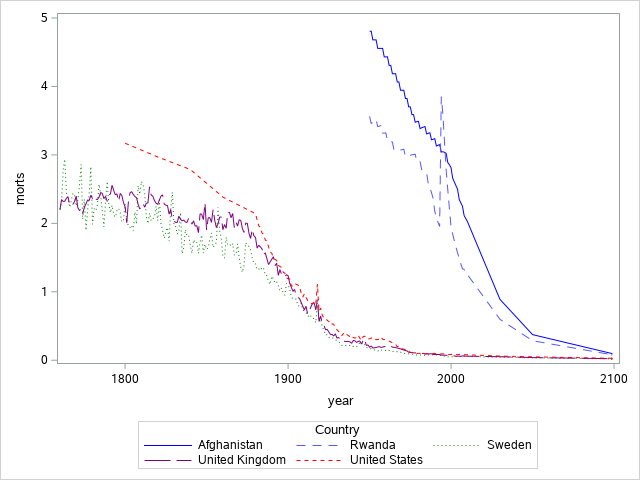

In [54]:
DATA line_map;
   INPUT id $2. +1 VALUE $15. LINEPATTERN $9. +1 LINECOLOR $10.;
   VALUE = strip(value);
   DATALINES;
lp Afghanistan    Solid     blue
lp Rwanda         Dash      light blue
lp Sweden         Dot       green
lp United Kingdom LongDash  purple
lp United States  ShortDash red
;
RUN;

PROC SGPLOT data = sub dattrmap = line_map;
    SERIES Y = morts X = year / group = country attrid = lp;
RUN;

We can also combine multiple attribute maps into a single dataset to adjust different visual attributes such as both plotting characters and line types.


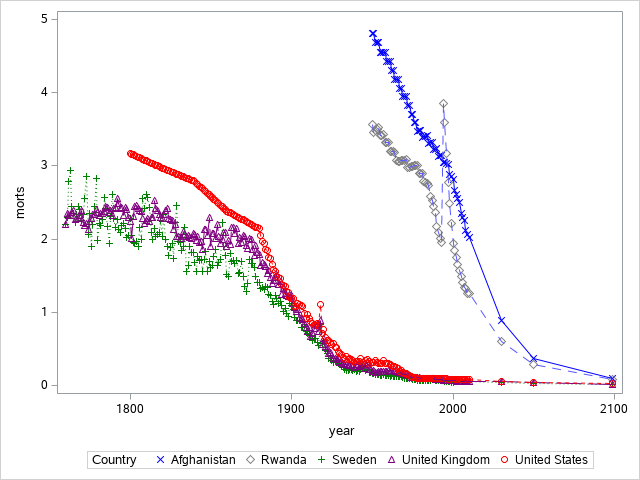

In [58]:
DATA my_map;
   INPUT id $2. +1 VALUE $15. LINEPATTERN $9. +1 LINECOLOR $10. +1 
         MARKERSYMBOL $8. MARKERCOLOR $10.;
   VALUE = strip(value);
   DATALINES;
am Afghanistan    Solid     blue       X         blue
am Rwanda         Dash      light blue Diamond   light blue 
am Sweden         Dot       green      plus      green
am United Kingdom LongDash  purple     triangle  purple
am United States  ShortDash red        circle    red
;
RUN;

PROC SGPLOT data = sub dattrmap = my_map;
    SCATTER Y = morts X = year / group = country attrid = am;
    SERIES Y = morts X = year / group = country attrid = am;
RUN;

### Modifying a Legend

To modify the legend in PROC SGPLOT, we can use the KEYLEGEND statement. For example, to change the title of a legend, we use the TITLE= option in KEYLENGND. To modify the labels made by a grouping variable, we need to apply a FORMAT.


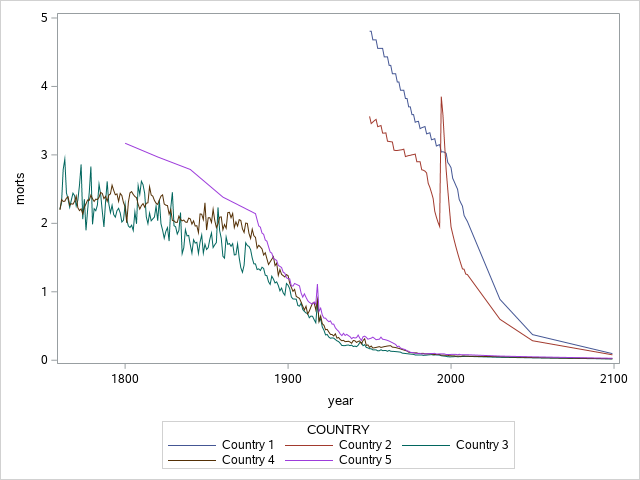

In [61]:
PROC FORMAT;
  VALUE $countryfmt
    "Afghanistan" = "Country 1"
    "Rwanda" = "Country 2"
    "Sweden" = "Country 3"
    "United Kingdom" = "Country 4"
    "United States" = "Country 5";
RUN;

PROC SGPLOT data = sub;
   SERIES Y = morts X = year / group = country;
   KEYLEGEND / TITLE = "COUNTRY";
   FORMAT country $countryfmt.;
RUN;

To hide the legend use the NOAUTOLEGEND option in PROC SGPLOT. Note if you manually set any legend options in the KEYLEGEND statement, then it will ignore the NOAUTOLEGEND option, so we need to remove the KEYLEGEND statement to suppress the legend.


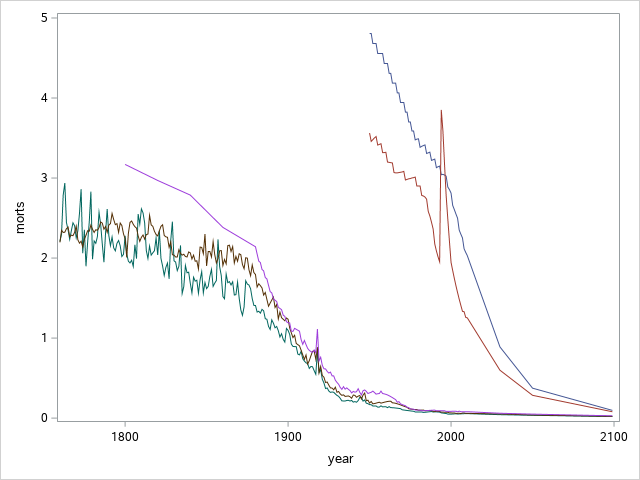

In [63]:
PROC SGPLOT data = sub NOAUTOLEGEND;
   SERIES Y = morts X = year / group = country;
RUN;

We can alter the position of the legend by using the POSITION option in KEYLEGEND. POSITION can take the values bottom, bottomleft, bottomright, left, right, top, topleft, and topright. We can also move the legend inside the plotting region by specifying LOCATION=INSIDE. To set the number of rows and columns formed in the legend use the ACROSS= and/or DOWN= options.


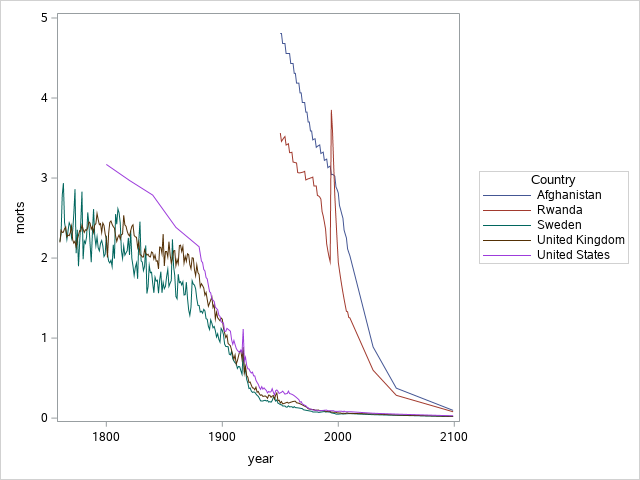

In [64]:
PROC SGPLOT data = sub NOAUTOLEGEND;
   SERIES Y = morts X = year / group = country;
   KEYLEGEND / POSITION = RIGHT;
RUN;


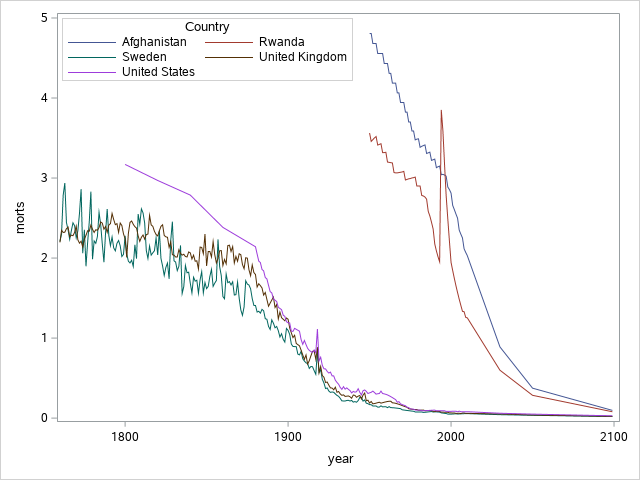

In [67]:
PROC SGPLOT data = sub NOAUTOLEGEND;
   SERIES Y = morts X = year / group = country;
   KEYLEGEND / POSITION = TOPLEFT LOCATION=INSIDE ACROSS=2;
RUN;

We can modify the appearance of the text in the legend by using the TITLEATTRS= and VALUEATTRS= options. These option take the different text properties such as color, size and font that we saw earlier.


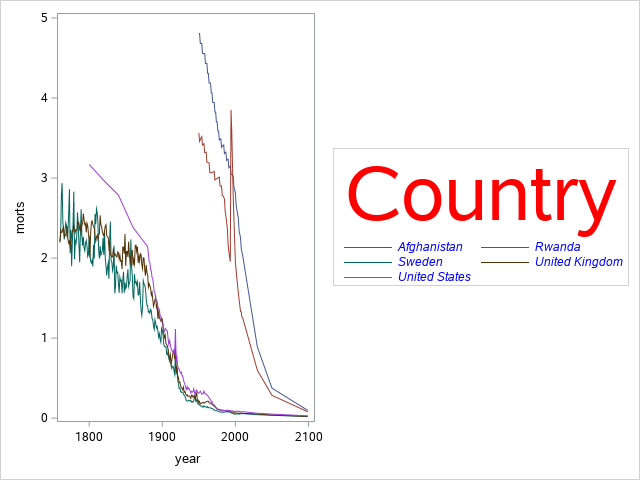

In [68]:
PROC SGPLOT data = sub NOAUTOLEGEND;
   SERIES Y = morts X = year / group = country;
   KEYLEGEND / POSITION = RIGHT ACROSS=2
               TITLEATTRS=(color='red' size=2cm)
               VALUEATTRS=(color='blue' style=ITALIC);
RUN;

### Adding Text Annotations

There are three ways to add text to a plot form PROC SGPLOT

* INSET
* TEXT
* SGANNO

The first example uses the INSET statement to add the correlation coefficient value to the a scatterplot.


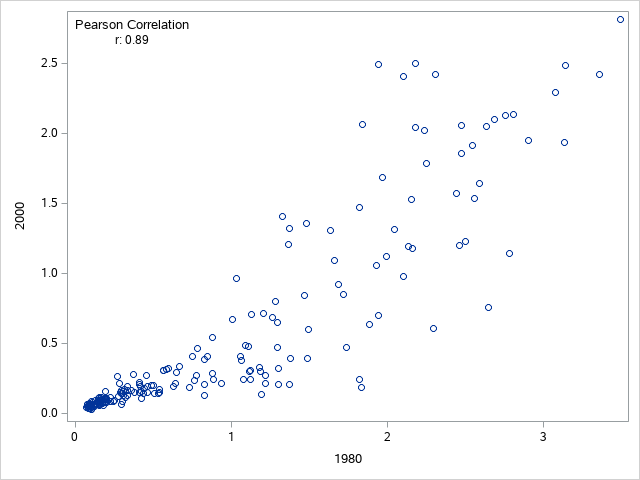

In [92]:
PROC SGPLOT DATA=mort;
   SCATTER Y = '2000'n X = '1980'n;
   INSET ("r: 0.89" = "") / Position = TOPLEFT TITLE = "Pearson Correlation" 
                            LABELALIGN = CENTER;
RUN;

The second way to add text is with the TEXT display. This displays text at an associatied (X,Y) location in the graph. 


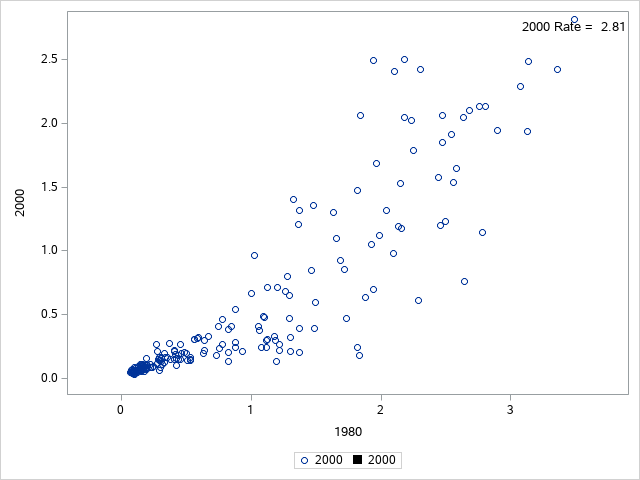

In [120]:
DATA mort;
   set mort (drop=text);
   LENGTH text $17;
   IF '2000'n > 2.5 THEN text = ("2000 Rate = " || '2000'n);
RUN;

PROC SGPLOT DATA=mort;
   SCATTER Y = '2000'n X = '1980'n;
   TEXT Y = '2000'n X = '1980'n TEXT=text / Position = bottom TEXTATTRS=(SIZE=10);
RUN;

The third way to add text is by using SGANNO. To use this method, we create a separate ANNOTATION dataset with out text label(s) in it to be added to the plot.


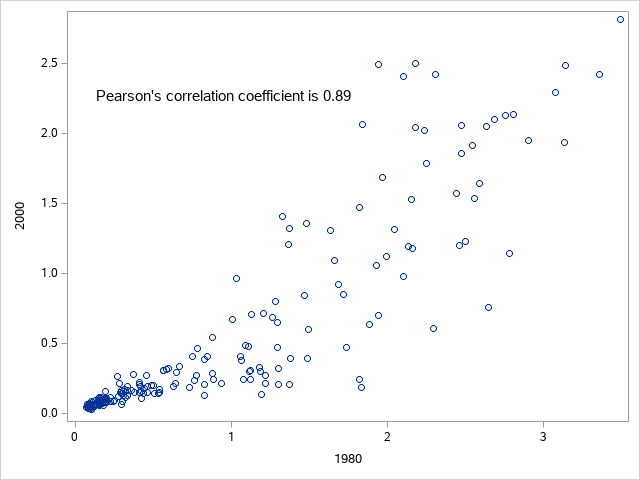

In [147]:
DATA mort_anno;
   LENGTH label $50 x1space $20 y1space $20;
   INPUT function $ label $ x1 y1 width x1space $ y1space $
         textsize;
   INFILE DATALINES DSD;
   DATALINES;
text,Pearson's correlation coefficient is 0.89,35,80,500,graphpercent,graphpercent,11
;
RUN;

PROC SGPLOT DATA=mort sganno=mort_anno;
   SCATTER Y = '2000'n X = '1980'n;
RUN;

See Yaqi Jia's paper <a href="https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2019/3644-2019.pdf">Three Ways to Add Text to Graphics in PROC SGPLOT</a> for more details.

### Drawing Multiple Plots in a Single Figure

If we want to break down a dense plot into smaller separate plots by some grouping, we can use PROC SGPANEL. For example, if I want 5 separate scatterplots with loess lines for the mortality data subset sub, we could use PROC SGPLANEL to break these into 5 separate plots instead of one that are plotted in a single panel.


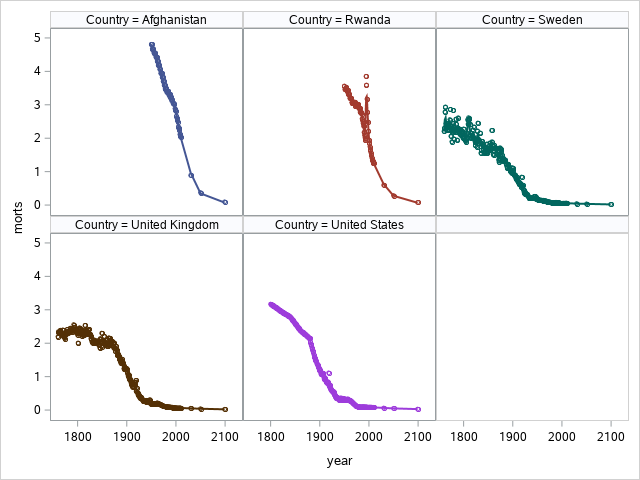

In [158]:
PROC SGPANEL data = sub NOAUTOLEGEND;
  panelby country; 
  SCATTER Y = morts X = year / group = country;
  LOESS Y = morts X = year / group = country;
  format country $20.;
RUN;

We can adjust the layout and number of rows and columns by using the ROWS= and COLUMNS= options in PANELBY;


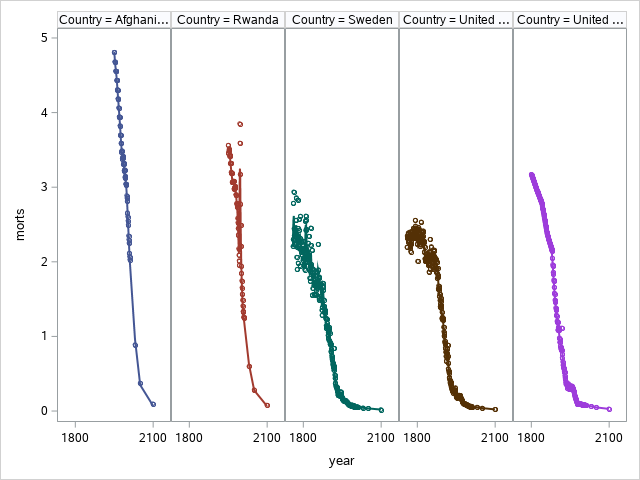

In [160]:
PROC SGPANEL data = sub NOAUTOLEGEND;
  panelby country / rows=1 columns=5; 
  SCATTER Y = morts X = year / group = country;
  LOESS Y = morts X = year / group = country;
  format country $20.;
RUN;

To include several differnt plots into a single figure, we can use the GRIDDED LAYOUT  feature of ODS GRAPHICS. To create the layout, we must first enable the grid layout and define the format by specifying the number of rows and columns. Then use the ODS REGION statement to break up what goes into each part of the grid.

In [164]:
PROC GLM data = mort(keep='2000'n '1980'n) NOPRINT;
   MODEL '2000'n = '1980'n;
   OUTPUT out=fitstat residuals = resid predicted = fitted;
RUN;

PROC PRINT data = fitstat(obs=5);
RUN;

Obs,1980,2000,resid,fitted
1,3.490352139,2.811858292,0.50536,2.30650
2,0.334426215,0.126746215,0.00002,0.12673
3,1.216621171,0.216880367,-0.51917,0.73605
4,3.139291928,2.484475049,0.42045,2.06403
5,0.301924994,0.140326167,0.03605,0.10428


,
,

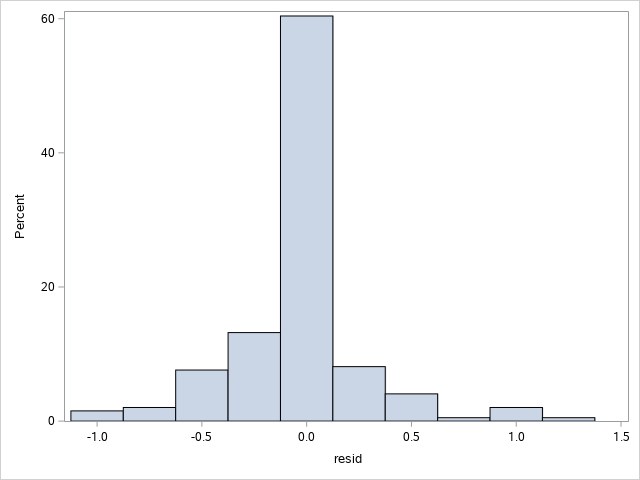
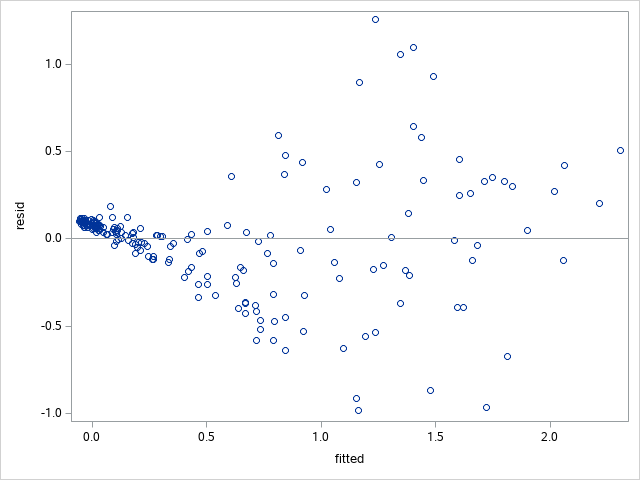
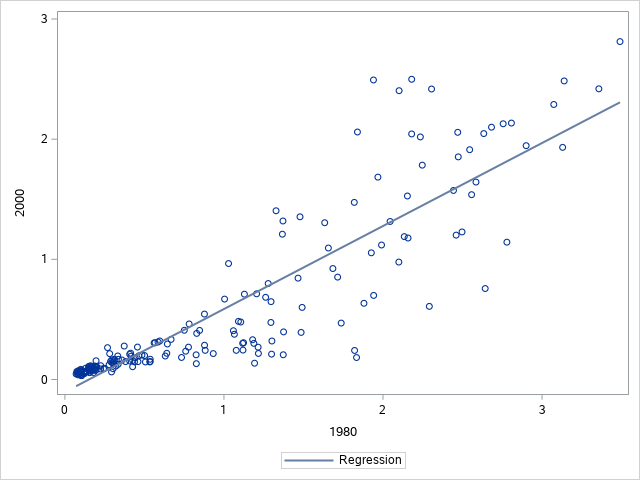
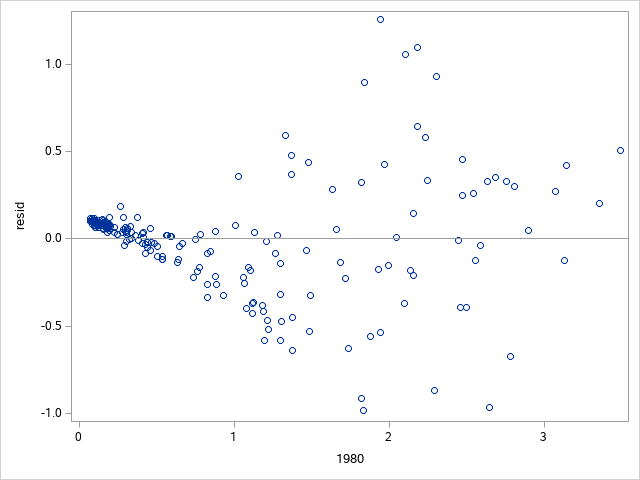

In [165]:
ODS LAYOUT GRIDDED columns = 2 rows = 2;
ODS REGION;
PROC SGPLOT data = fitstat;
  HISTOGRAM resid;
RUN;
ODS REGIONS;
PROC SGPLOT data = fitstat;
   SCATTER Y = resid X = fitted;
   REFLINE 0 / AXIS = Y;
RUN;
ODS REGION;
PROC SGPLOT data = fitstat;
   REG Y = '2000'n X = '1980'n;
RUN;
ODS REGION;
PROC SGPLOT data = fitstat;
   SCATTER Y = resid X = '1980'n;
   REFLINE 0 / AXIS = Y;
RUN;
ODS LAYOUT END;

To save these plots, we will use the ODS destinations we learned earlier such as PDF or RTF to save these plots to an external file.

## Exercises

For these exercises, we will use the charm city circulator bus ridership dataset, Charm_City_Circulator_Ridership.csv. After modifying the path to the dataset on your computer, use the following code to read in and transform the dataset to be ready for use in plotting.

In [3]:
PROC IMPORT datafile = "/folders/myfolders/SAS_Notes/data/Charm_City_Circulator_Ridership.csv"
            out = circ dbms = csv replace;
    getnames = yes;
    guessingrows = max;
RUN;

DATA long;
   SET circ;
   ARRAY larray(*) orangeBoardings -- bannerAverage;
   DO i = 1 TO dim(larray);
      var = vname(larray(i));
      number = larray(i);
      var = tranwrd(var, 'Board', ' Board');
      var = tranwrd(var, 'Alight', ' Alight');
      var = tranwrd(var, 'Average', ' Average');
      route = scan(var, 1);
      type = scan(var, 2);
      OUTPUT;
    END;
    
    DROP i var orangeBoardings -- bannerAverage;
RUN;

DATA avg;
  SET long;
  WHERE type = 'Average' and number ne .;
RUN;

PROC PRINT data = long(obs = 10);
RUN;

PROC PRINT data = avg(obs=10);
RUN;

Obs,day,date,daily,number,route,type
1,Monday,01/11/2010,952,877,orange,Boardings
2,Monday,01/11/2010,952,1027,orange,Alightings
3,Monday,01/11/2010,952,952,orange,Average
4,Monday,01/11/2010,952,.,purple,Boardings
5,Monday,01/11/2010,952,.,purple,Alightings
6,Monday,01/11/2010,952,.,purple,Average
7,Monday,01/11/2010,952,.,green,Boardings
8,Monday,01/11/2010,952,.,green,Alightings
9,Monday,01/11/2010,952,.,green,Average
10,Monday,01/11/2010,952,.,banner,Boardings


1. Plot average ridership (avg data set) by date using a scatterplot.
    a. Color the points by route (orange, purple, green, banner). Default colors are fine here.
    b. Add black smoothed curves (LOESS) for each route
    c. Color the points by day of the week
2. Replot 1a where the colors of the points are the name of the route (with banner –> blue). Note: you will need to make a data attribute map.
3. Plot a scatterplot of average ridership by date with one panel per route.
4. Plot a scatterplpot of average ridership by date with separate panels by day of the week, colored by route.
5. Plot a scatterplot of average ridership (avg) by date, colored by route (same as 1a). (do not take an average, use the average column for each route). Make the x-label "Year". Make the y-label "Number of People".
6. Plot average ridership on the orange route versus date as a solid line, and add dashed “error” lines based on the boardings and alightings. The line colors should be orange.